# Visualization : Cam EigenCam GradCam

In [48]:
import matplotlib.pyplot as plt

from cams.visualizer import Visualizer
from utils.image import *
from utils.labels import get_labels
import numpy as n

## Parameters

In [49]:
MODEL_NAME = 'RAF-impr-std_0124-1008_weights.h5'
LAST_CONV_NAME = 'block3_conv3'
IMG_SHAPE = (100,100,3)
emotion_labels = get_labels(MODEL_NAME)
n_imgs = {'happiness':18, 'surprise':14, 'sadness':13, 'anger':19, 'disgust':15, 'fear':14}
print(emotion_labels)
ordered_e = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear']

['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear']


## Visualizer

In [50]:
vis = Visualizer(MODEL_NAME, LAST_CONV_NAME, IMG_SHAPE)

## get heatmaps : Cam, EigenCam, GradCam

In [51]:
imgs = []
heatmaps_C, heatmaps_C_l = [], []
heatmaps_E = []
heatmaps_G, heatmaps_G_l = [], []
preds = []

def mean_imgs(imgs:list):
    mean_i = np.mean(np.array(imgs), axis=0)
    return mean_i

for emotion in ordered_e[1:]:
    correct_label = emotion_labels.index(emotion)
    num_imgs=n_imgs[emotion]
    img_list = ['./data/aligned_i/{emotion}/{emotion}_{n}.jpg'.format(n=i, emotion=emotion) for i in range(1,num_imgs+1)]
    img_tensors, img_tensors_rgb, img_tensors_not_rgb = img_to_input_tensor(img_list, IMG_SHAPE)

    heatmap_CAM, pred_CAM = vis.getCAM(img_tensors_rgb, preprocess=False)
    heatmap_CAM_l, pred_CAM_l = vis.getCAM(img_tensors_rgb, preprocess=False, start_idx=correct_label)
    heatmap_EigenCam, pred_EigenCam = vis.getEigenCAM(img_tensors_rgb, preprocess=False)
    heatmap_GradCam, pred_GradCam = vis.getGradCAM(img_tensors_rgb, preprocess=False)
    heatmap_GradCam_l, pred_GradCam_l = vis.getGradCAM(img_tensors_rgb, preprocess=False, start_idx=correct_label)

    imgs.append(mean_imgs(img_tensors))
    heatmaps_C.append(mean_imgs(heatmap_CAM))
    heatmaps_C_l.append(mean_imgs(heatmap_CAM_l))
    heatmaps_E.append(mean_imgs(heatmap_EigenCam))
    heatmaps_G.append(mean_imgs(heatmap_GradCam))
    heatmaps_G_l.append(mean_imgs(heatmap_GradCam_l))

    preds.append(pred_CAM)

In [52]:
def get_accuracy(preds, correct_label):
    mean_sicherheit = np.array([float(pred) for idx, pred in preds if idx == correct_label]).mean()
    accuracy = sum(1 for idx, _ in preds if idx == correct_label) / len(preds)
    return mean_sicherheit.__round__(1), accuracy.__round__(3)

accuracy = [get_accuracy(pred_emotion, correct_label) for pred_emotion, correct_label in zip(preds, [3,0,4,5,2,1])]

## Result

In [53]:
methods = ['CAM', 'EigenCAM','GradCAM']
labels = [e + ' ' + str(acc) for e, acc in zip(ordered_e[1:], accuracy)]
[labels.extend([methode + ' : ' + emotion for emotion in ordered_e[1:]]) for methode in methods]

[None, None, None]

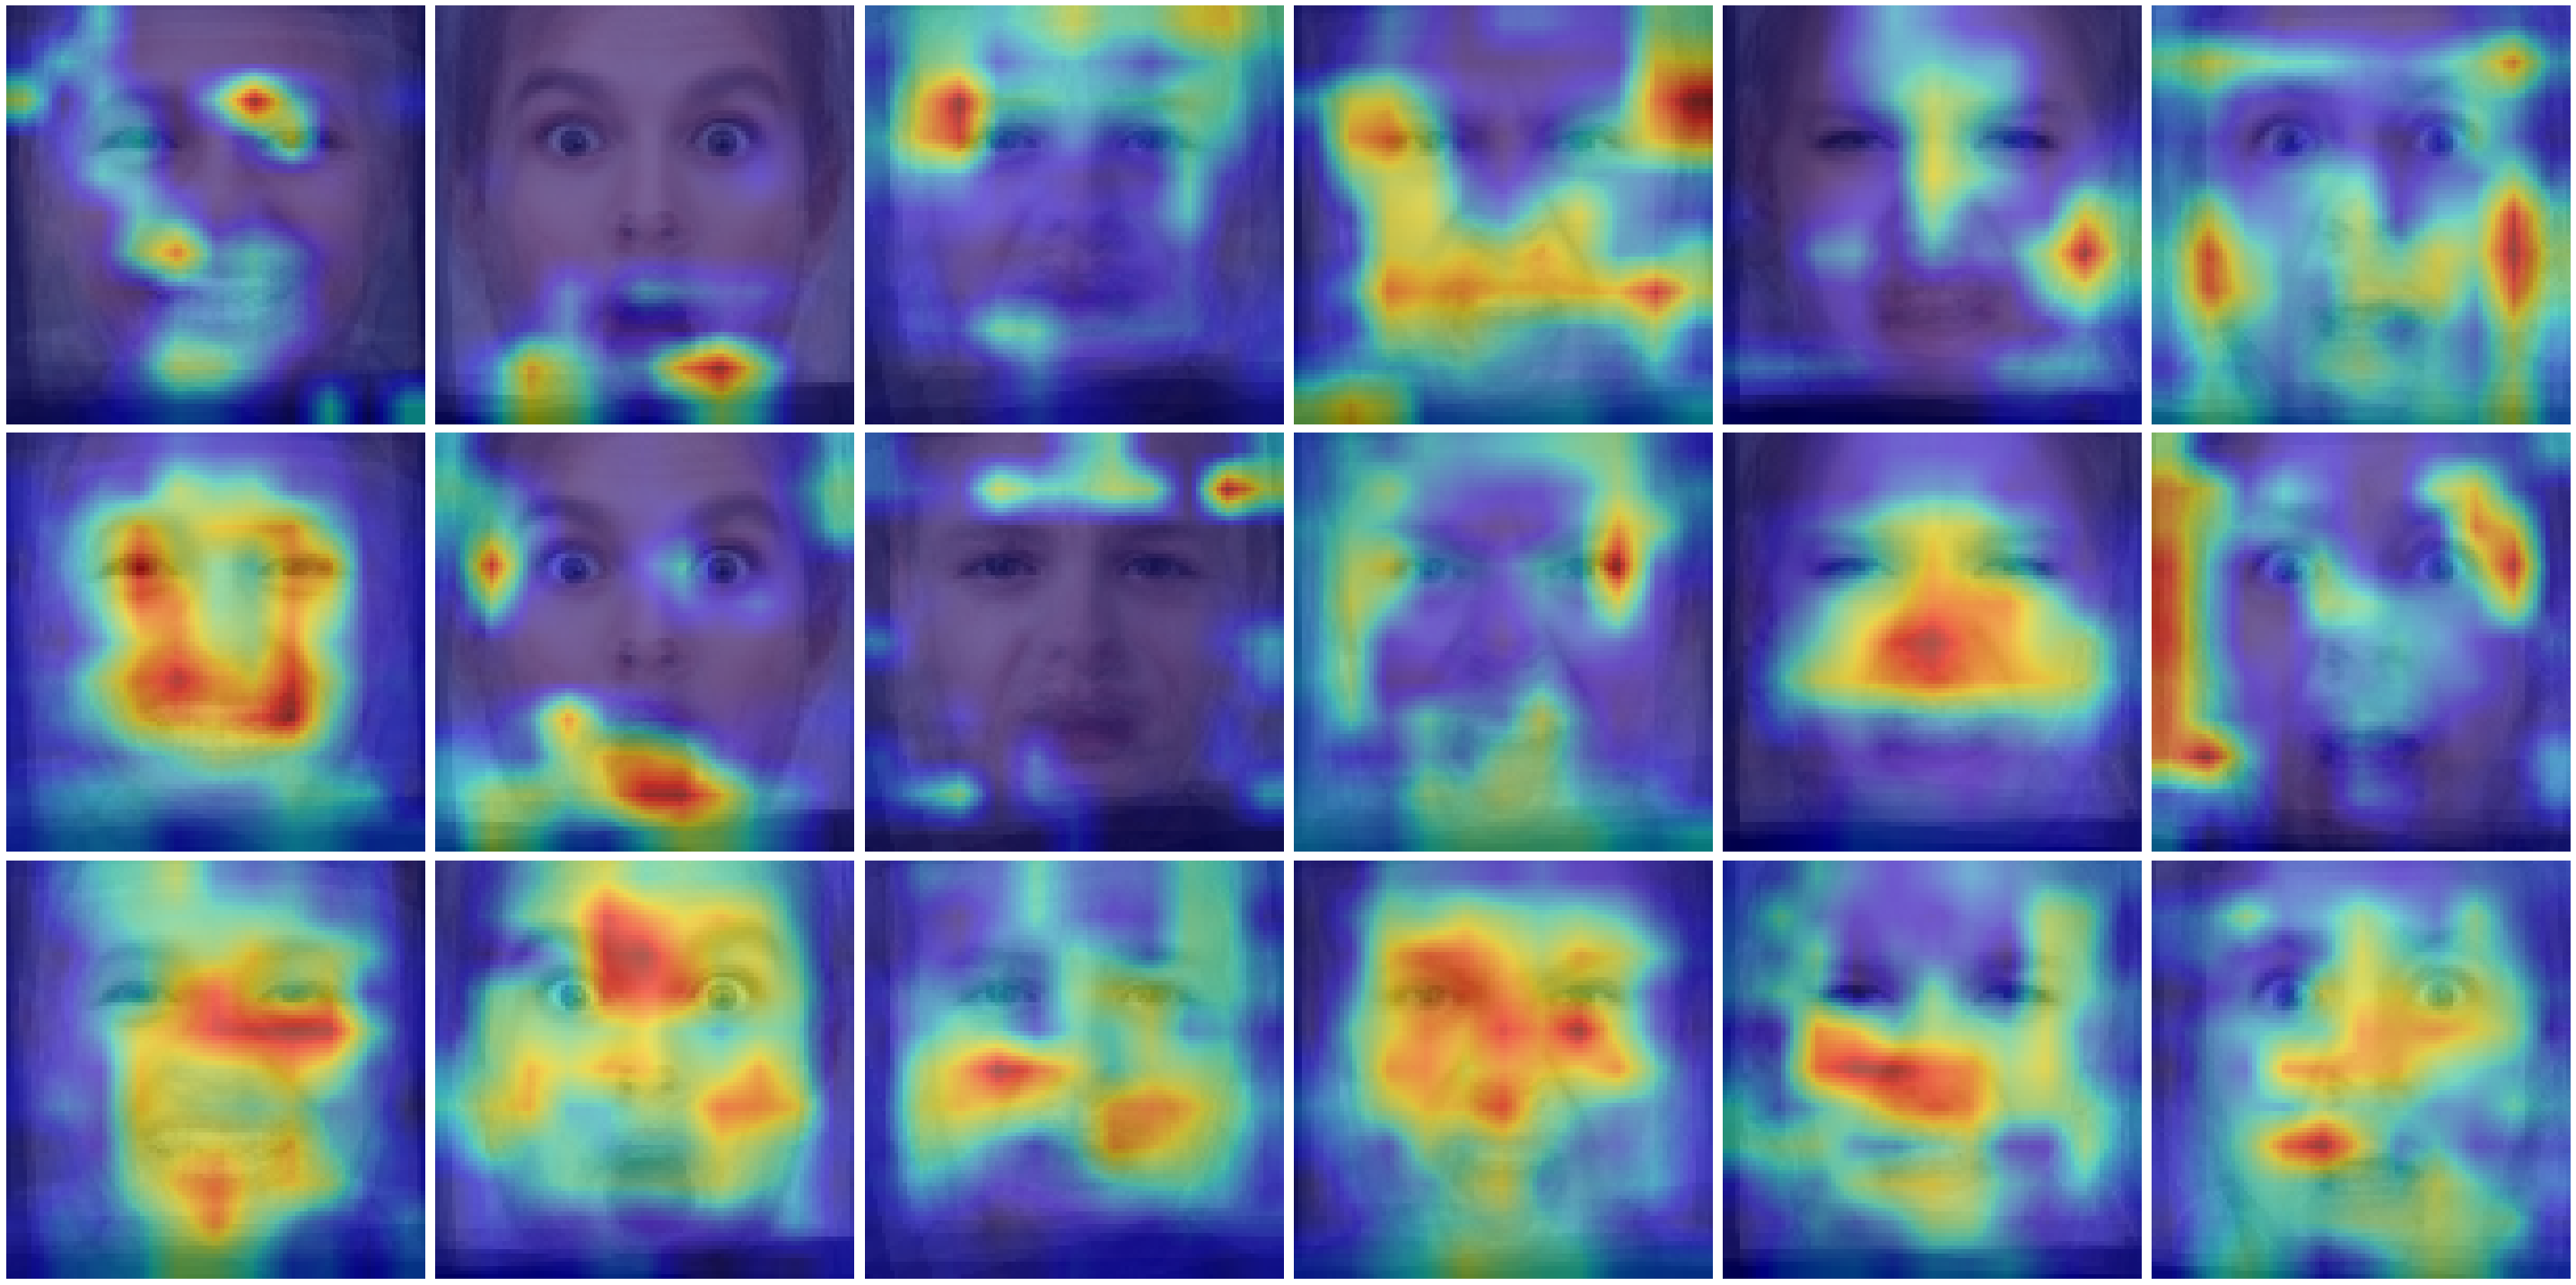

In [54]:
#pp_images(imgs*4, imgs+heatmaps_C_l+heatmaps_E+heatmaps_G_l, labels = labels, wd=6 , figsize=(20,13), fontsize=60)
pp_images(imgs*3, heatmaps_C_l+heatmaps_G_l+heatmaps_E, wd=6 , figsize=(40,20), fontsize=60, axis=False)
#pp_images(imgs*1, imgs, wd=6 , figsize=(20,20), fontsize=60)

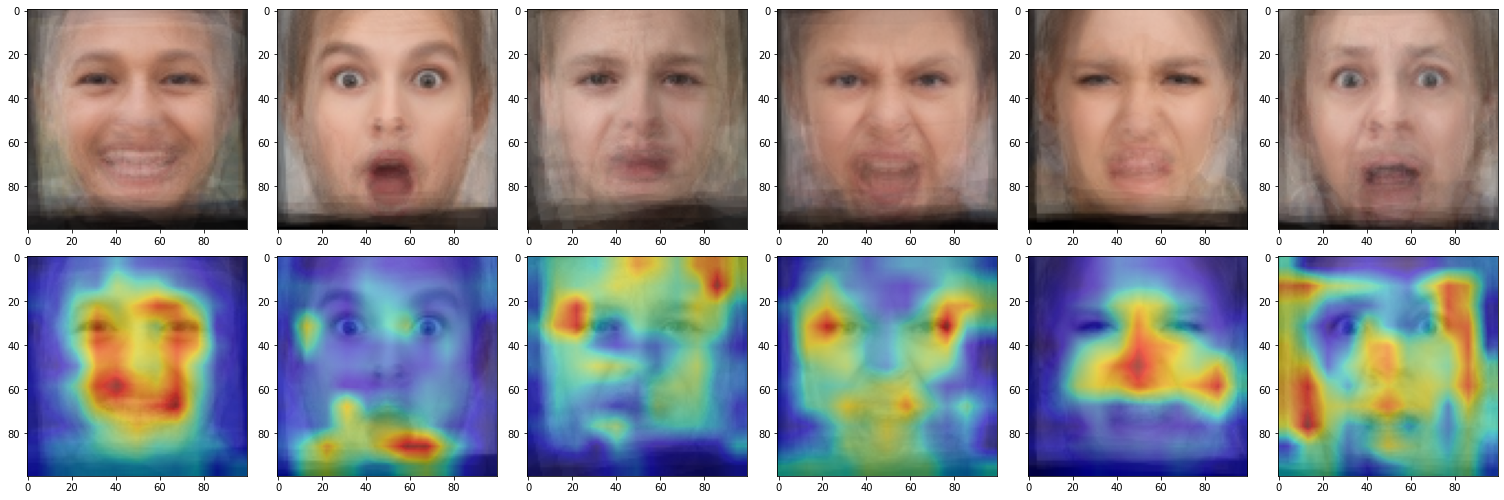

In [55]:
def mean_cams(cams, gradcams, eigencams):
    heatmaps = [np.mean(np.array([cam, gradcam,eigencam]), axis=0) for cam, gradcam, eigencam in zip(cams, gradcams, eigencams)]
    return heatmaps

pp_images(imgs*2, imgs+mean_cams(heatmaps_C_l,heatmaps_G_l,heatmaps_E), wd=6 , figsize=(21,7), fontsize=60)

## save result

In [56]:
"""
save_path = './vis_results/raf/'
titles = labels
heatmaps = heatmaps_C_l+heatmaps_E+heatmaps_G_l
save_results(save_path, imgs, heatmaps, titles)
"""

"\nsave_path = './vis_results/raf/'\ntitles = labels\nheatmaps = heatmaps_C_l+heatmaps_E+heatmaps_G_l\nsave_results(save_path, imgs, heatmaps, titles)\n"